In [ ]:
# %%

# import the necessary libraries
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure

# set the the prefered configuration
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (24,16)
pd.options.mode.chained_assignment = None



pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 2787

In [ ]:
# %%

# here we create the dataframe we are gonna be using

df1 = pd.read_csv(r"D:\Data Projects\Netflix Project\netflix_titles.csv")


df2 = pd.read_csv(r"D:\Data Projects\Netflix Project\IMBD.csv")
df3 = df2[['movie', 'rating']] # we take the necessay columns

df4 = df1.merge(df3, how = 'left', left_on = 'title', right_on = 'movie') 

# get rid of unnecessary data

df4.dropna(subset=["date_added"], inplace=True) 
df4.drop_duplicates()

df_rating = df4.groupby('date_added').agg(movie_count = ('movie', 'count'), rating_avg = ('rating_y', 'mean')).reset_index() # we specify the names of our new columns to avoid multilevel

# data cleaning

df_rating['date_added'] = df_rating['date_added'].str.strip() 
df_rating['date_added'] = pd.to_datetime(df_rating.date_added)

# take the last piece of data and merge it

df_stock = pd.read_csv(r"D:\Data Projects\Netflix Project\nflx_2014_2023.csv")
df_stock['date'] = pd.to_datetime(df_stock.date)

df = df_stock.merge(df_rating, how = 'left', left_on = 'date', right_on = 'date_added')

                             date      open      high       low     close  \
date                     1.000000  0.788533  0.790217  0.787821  0.789036   
open                     0.788533  1.000000  0.999635  0.999632  0.999210   
high                     0.790217  0.999635  1.000000  0.999536  0.999648   
low                      0.787821  0.999632  0.999536  1.000000  0.999632   
close                    0.789036  0.999210  0.999648  0.999632  1.000000   
volume                  -0.411959 -0.428942 -0.423835 -0.434774 -0.428513   
rsi_7                   -0.048845  0.005028  0.009055  0.014255  0.017893   
rsi_14                  -0.078286  0.009556  0.011405  0.017521  0.018915   
cci_7                   -0.025401  0.004035  0.010457  0.013769  0.018077   
cci_14                  -0.025053  0.016694  0.020315  0.024709  0.026694   
sma_50                   0.798680  0.978886  0.979184  0.977727  0.978104   
ema_50                   0.804555  0.983795  0.984057  0.982749  0.983071   

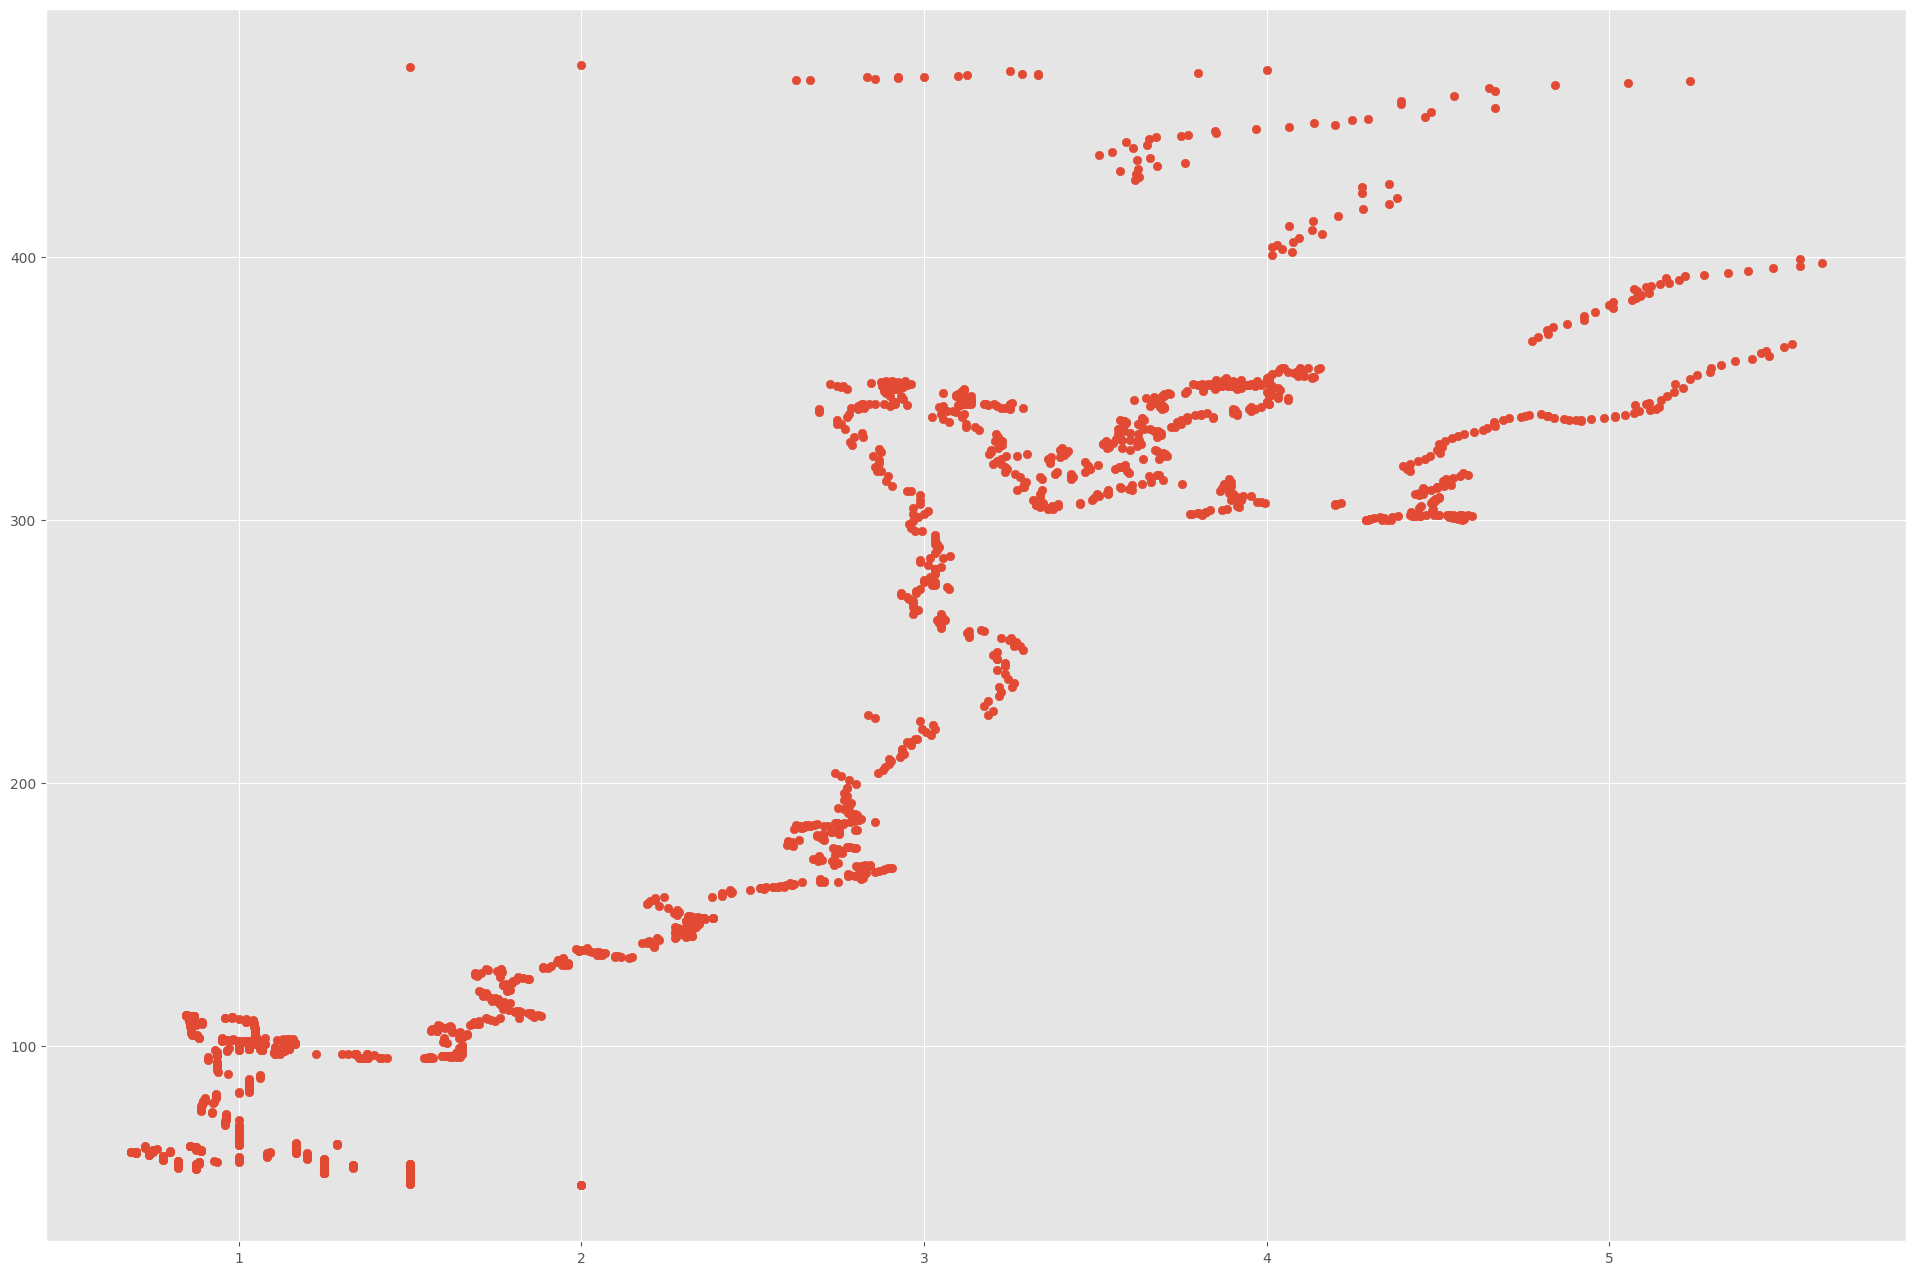

In [ ]:
# %%

# taking the mean of the amount of released movies and tv-shows in the last 60 months and ploting it against the ema-100
# the bigger the company becomes, higher is the amount of media they release.

df['movie_count_180days_avg'] = df['movie_count'].rolling(window=180, min_periods=1).mean()

plt.scatter(x = df.movie_count_180days_avg, y = df.ema_100)

print (df.corr())

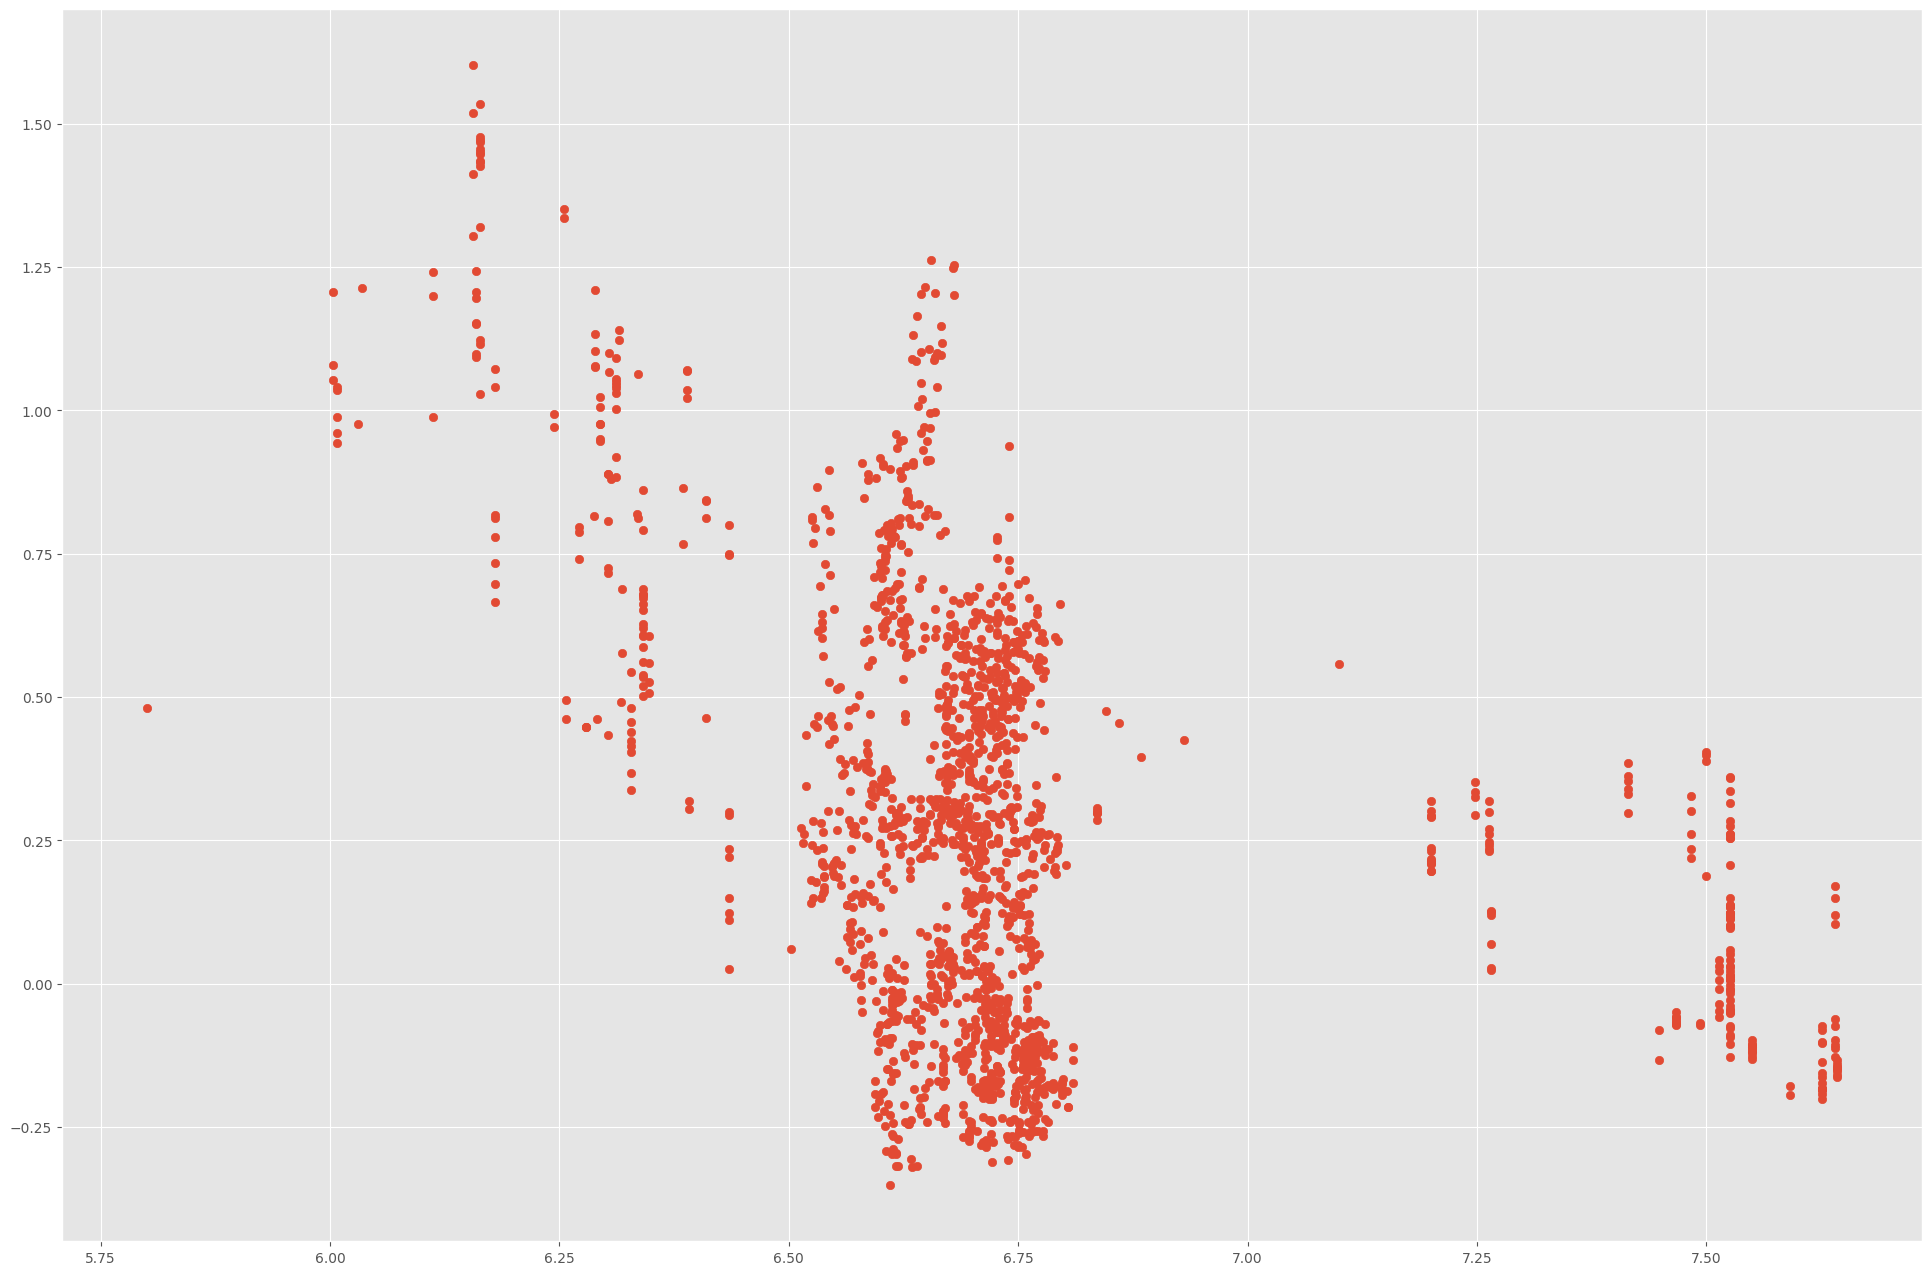

In [ ]:
# %%

# average of rating in the last 6 months against the stock perfomance in te same period
# the correlation it's moderate to low and inverse

df['rating_180day_avg'] = df['rating_avg'].rolling(window=180, min_periods=1).mean()
df['close_180day_var'] = (df['close'] - df['close'].shift(180)) / df['close'].shift(180)

plt.scatter(x = df.rating_180day_avg, y = df.close_180day_var)

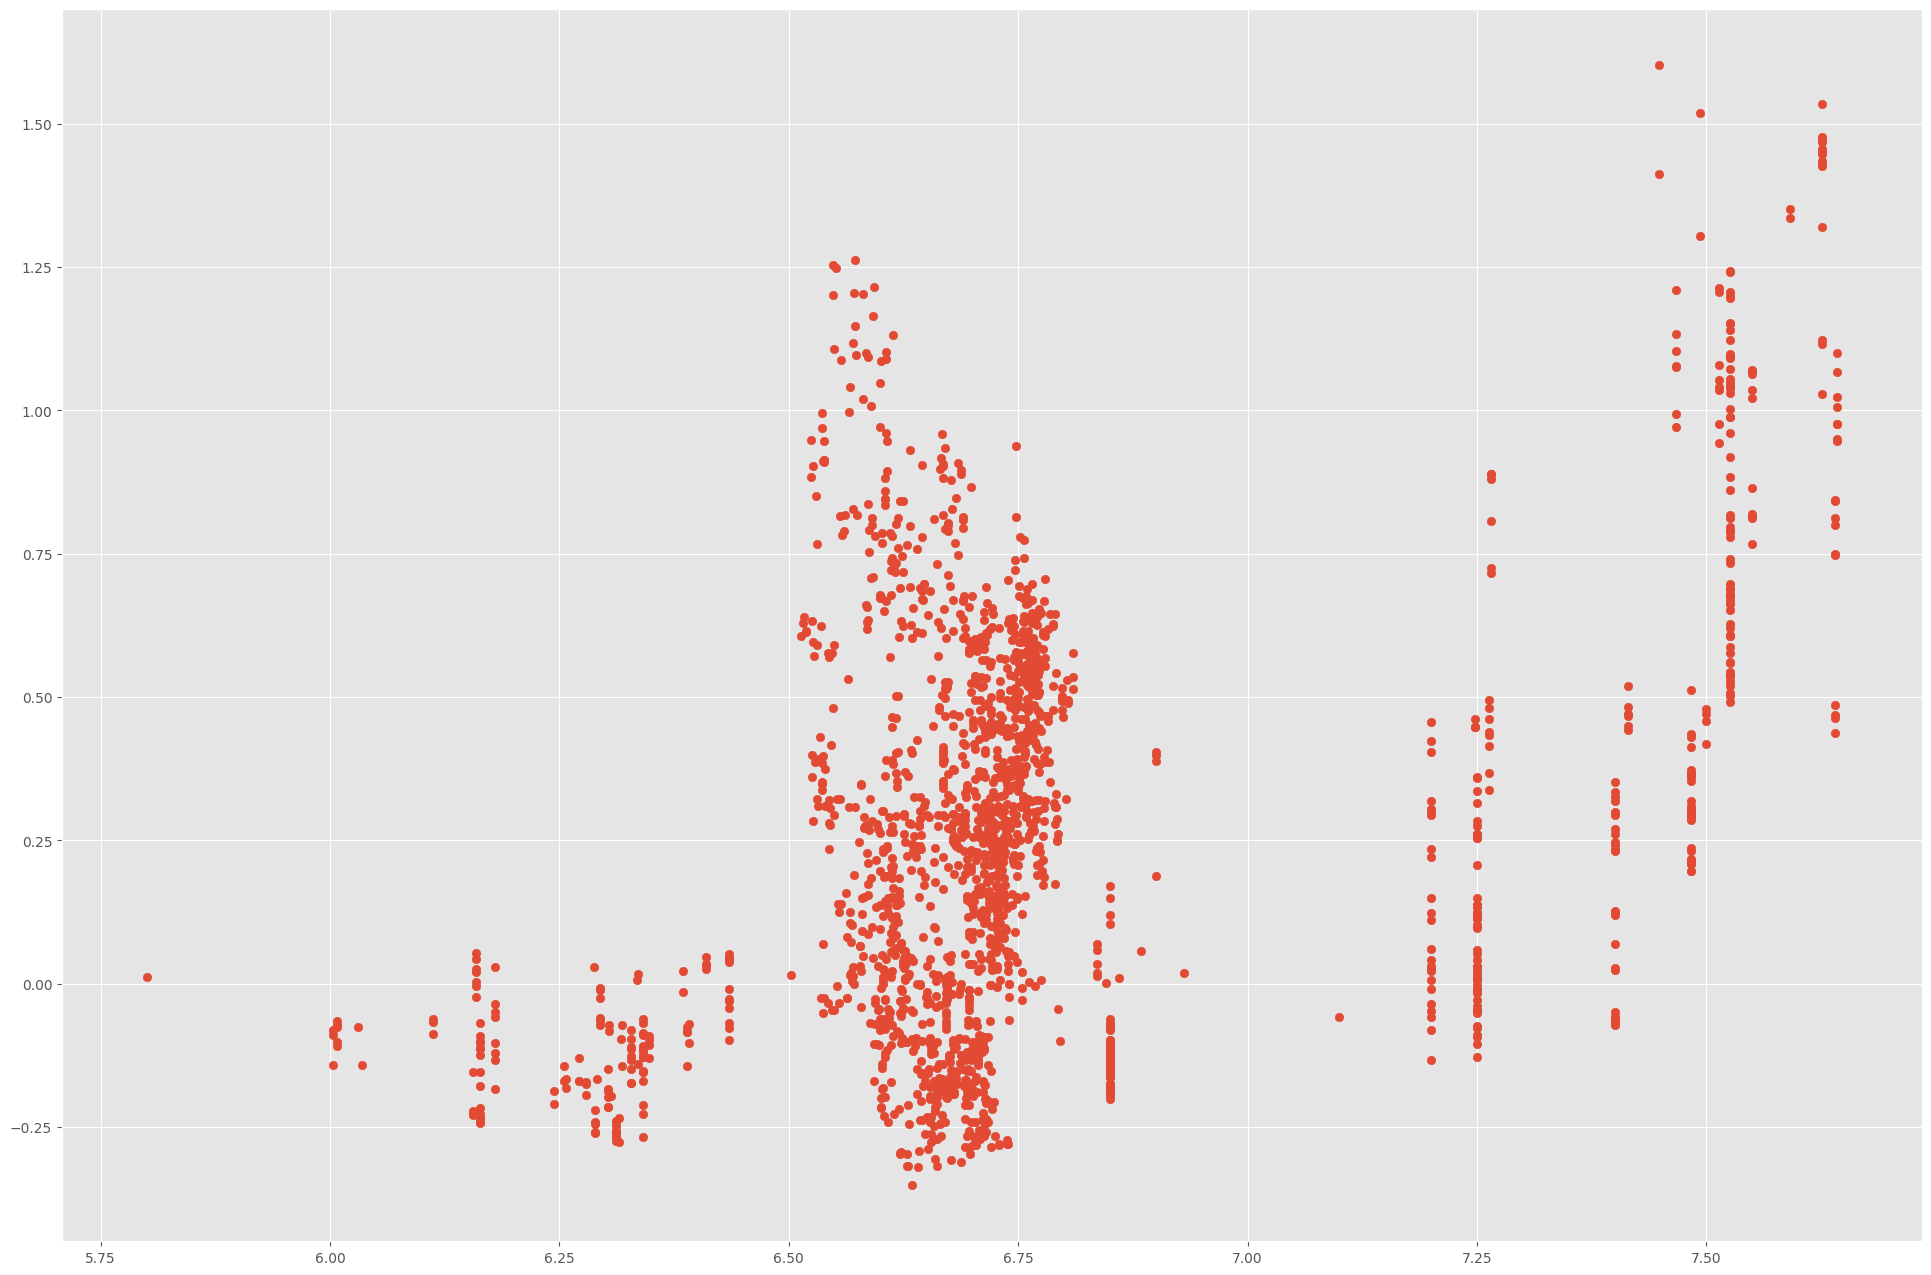

In [ ]:
# %%

# average of rating in the previous 6 months against the stock perfomance in te same period
# correlation is moderate to low again but is direct this time, since netflix releases data each semester this would make sense.

df['past_180days_rating'] = df['rating_avg'].shift(180)
df['past_180days_rating_180day_avg'] = df['past_180days_rating'].rolling(window=180, min_periods=1).mean()
df['close_180day_var'] = (df['close'] - df['close'].shift(180)) / df['close'].shift(180)

plt.scatter(x = df.past_180days_rating_180day_avg, y = df.close_180day_var)

                                    date      open      high       low  \
date                            1.000000  0.788533  0.790217  0.787821   
open                            0.788533  1.000000  0.999635  0.999632   
high                            0.790217  0.999635  1.000000  0.999536   
low                             0.787821  0.999632  0.999536  1.000000   
close                           0.789036  0.999210  0.999648  0.999632   
volume                         -0.411959 -0.428942 -0.423835 -0.434774   
rsi_7                          -0.048845  0.005028  0.009055  0.014255   
rsi_14                         -0.078286  0.009556  0.011405  0.017521   
cci_7                          -0.025401  0.004035  0.010457  0.013769   
cci_14                         -0.025053  0.016694  0.020315  0.024709   
sma_50                          0.798680  0.978886  0.979184  0.977727   
ema_50                          0.804555  0.983795  0.984057  0.982749   
sma_100                         0.8125

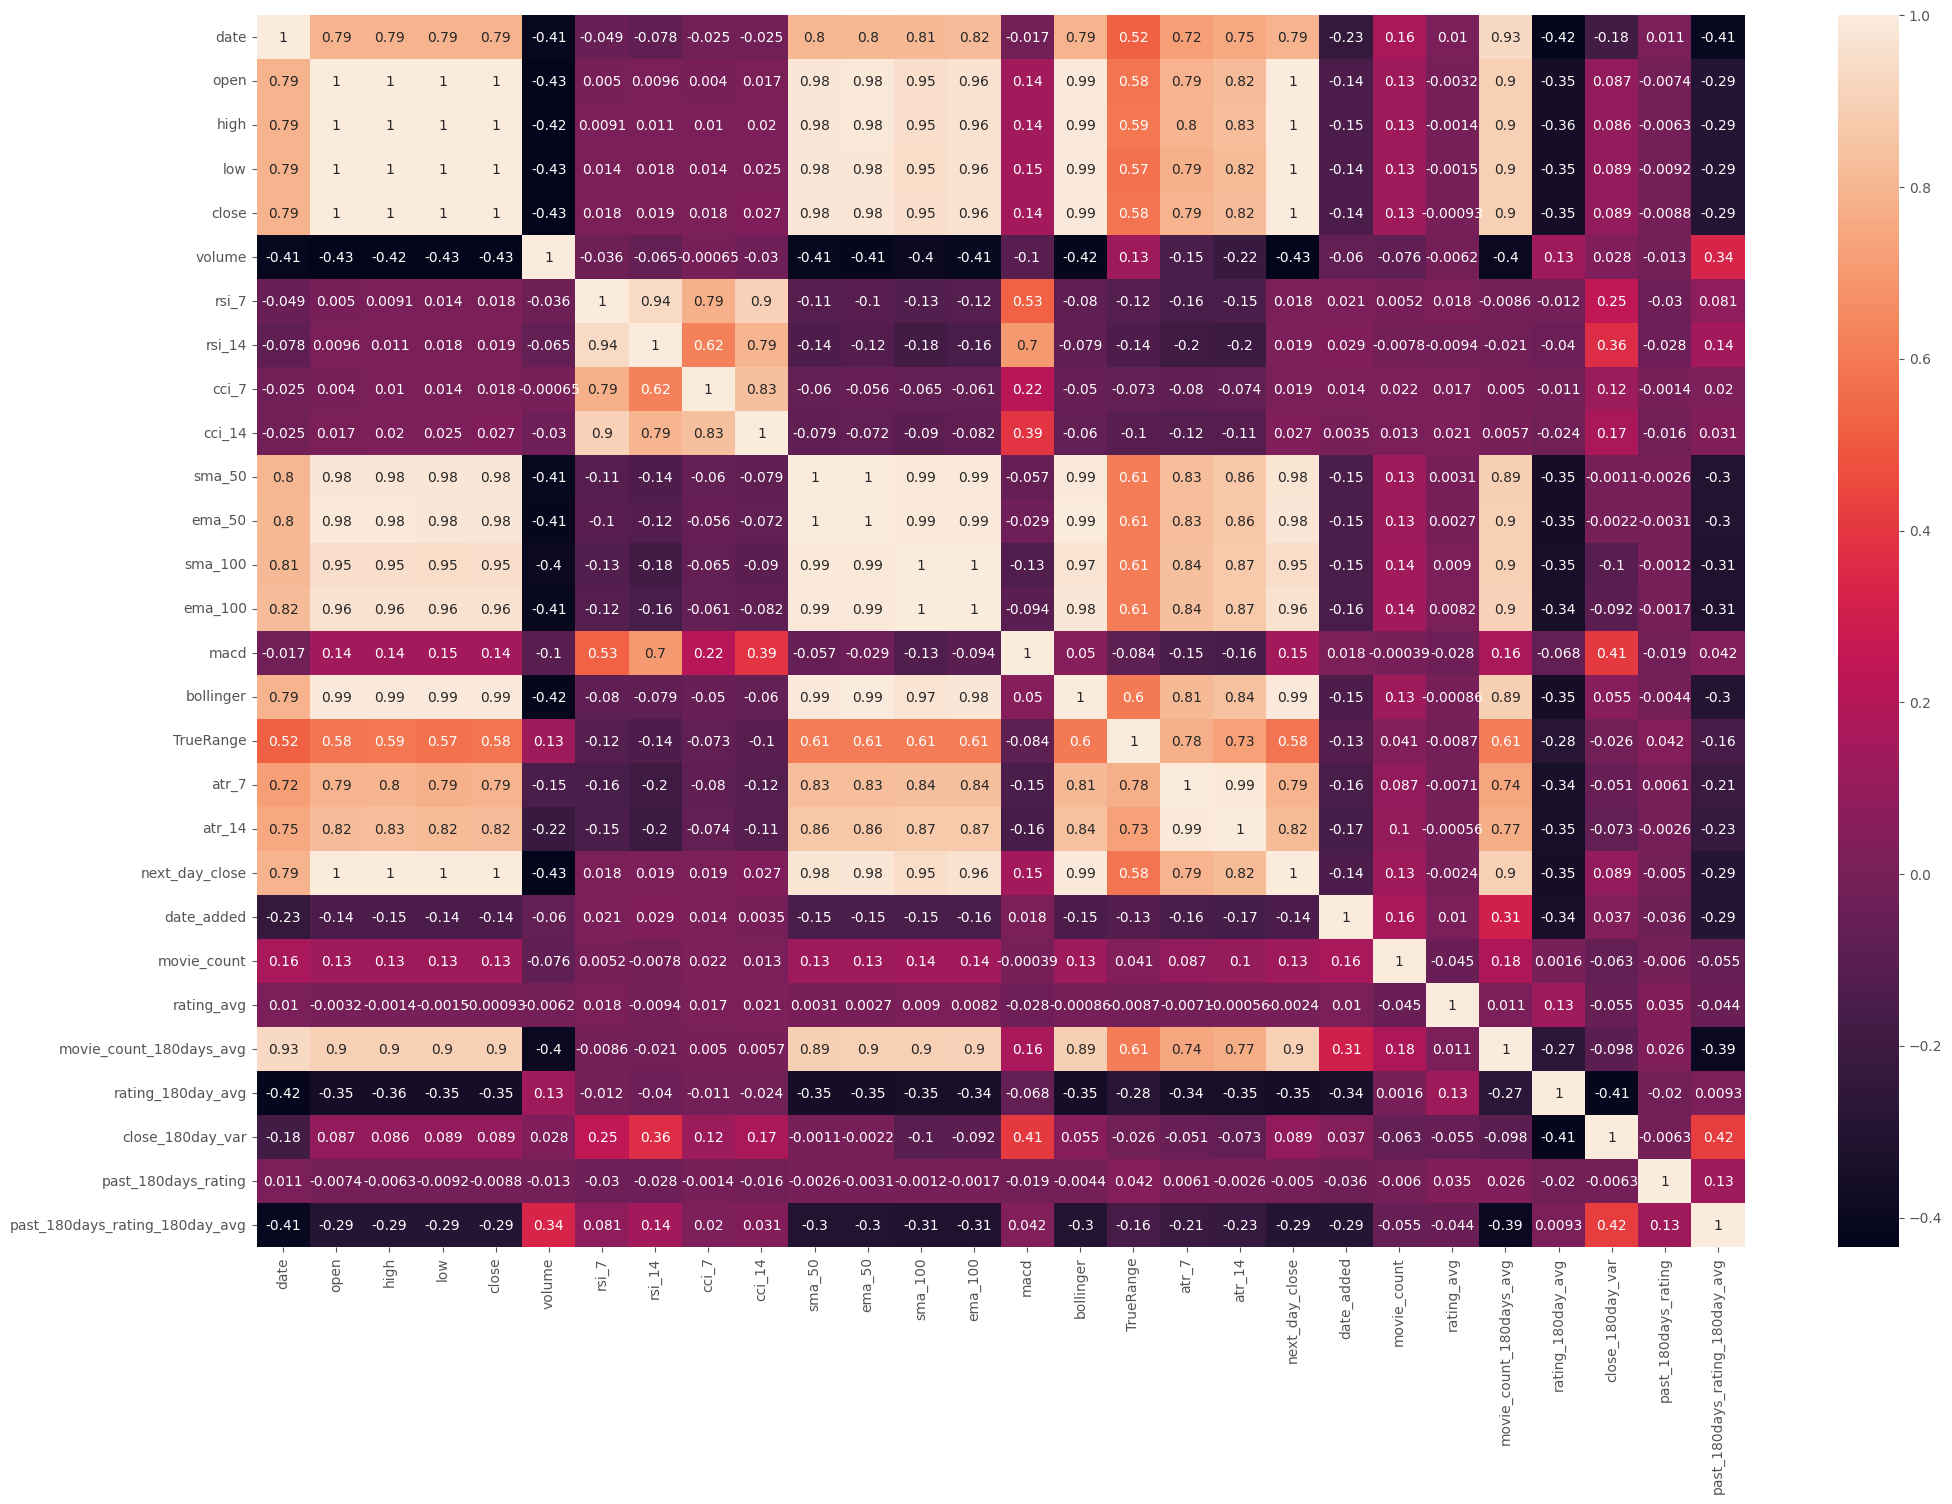

In [ ]:
# %%

print (df.corr())
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

plt.show()